For Linear Regression, we assume graphs look like: y = mx + b

Where:
- y = predicted value (dependent variable)
- x = input feature (independent variable)
- m = slope (how much y changes when x increases by 1)
- b = intercept (value of y when x = 0)

Salary=5000×(Years of Experience)+30000

The method for fitting a line is called "Least Squares"

To measure how well the line fits the data, we calculate the sum of squared residuals. This is done by taking (b - y)^2 for each point and summing them. 

After that, we rotate the line and calculate the sum of squared residuals again using the new intercept b, when we have that we can compare it against the current sum of squared residuals, if it is lower it is better as it means that the line is better fitted.

To find the sweet spot, we use the generic line equation: y = mx + b, find the optimal values for m and b so that we minimize the sum of the squared residuals. ((mx1 + b) - y1)^2 calculate the distance between the line and the observed value.

Key concepts:
1. We want to minimize the square of the distance between the observed values and the line.
2. We do this by taking the sum of squared residuals and finding the rotation that has the least sum of squares

After we have defined m and b, we can use it to predict what x or y will be with either of them. eg. y = 0.1 + 0.78x

To answer if the line fits the data better than the mean and how much better, we can do the following:

- Variation(mean) = Sum(actual data point - mean)^2
- Variation(Least Squares Line) = Sum(actual data point - Least Squares Line)^2 or the sum of squared residuals

To calculate R^2 to quantify the difference between the best line and the mean, (Var(mean) - Var(Least Squares Line))/ Var(mean)

eg. 

Var(mean) = 32
Var(Least Squares Line) = 6

(32-6) / 32 = 0.81 = 81% which also means there is 81% less variation around the Least Squares Line than the mean. / The relationship accounts for 81% of the variation.

To understand how strong the evidence is that a variable actually affects the outcome rather than the observed effect being due to random chance, we can calculate the p-value.

- Small p-value means that it is unlikely due to chance -> statistically significant.
- Large p-value means that it is easily due to chance -> not statistically significant.

In [40]:
import pandas as pd

df = pd.read_csv("Student_Performance.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


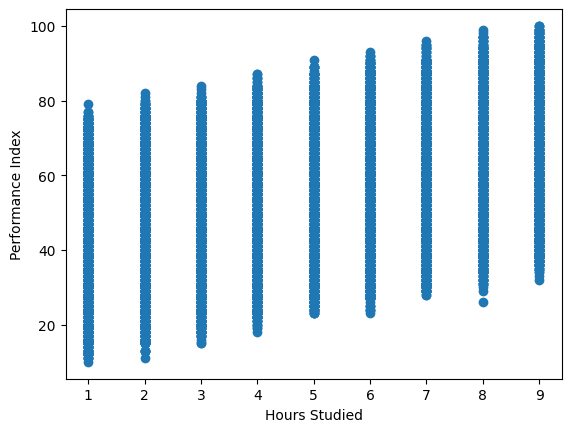

In [6]:
import matplotlib.pyplot as plt

x = df[['Hours Studied']]
y = df['Performance Index']

plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.scatter(x, y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The slope (how much y changes when x increases by 1) . or m in y = mx+b
model.coef_
# For every 1 hour increase, performance increases by 2.80635386

array([2.80635386])

In [ ]:
# The value of y when all x values are 0. or b in y = mx+b 
model.intercept_

np.float64(41.27747239667509)

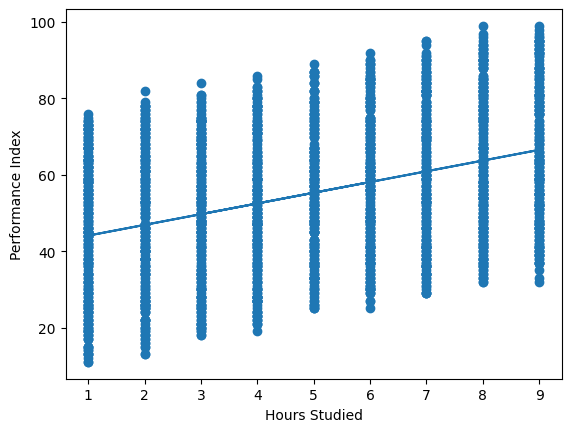

In [28]:
# Predict X (Hours Studied) using Y (Performance Index)
y_pred = model.predict(X_test)
y_pred
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

In [ ]:
# This means that there is 13% less variation around the Least Squares Line than the mean. / The relationship between Hours Studied & Performance Index accounts for 13% of the variation.
# This is probably because there are other factors at play, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced etc.
r2 = model.score(x, y)
print("R²:", r2)
print("\n")
df.info()

R²: 0.13964296708950186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

possible_x_vals = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]

for x_val in possible_x_vals:
    x = df[[x_val]]
    y = df['Performance Index']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    r2 = model.score(x, y)
    print(f"{x_val} R²:", r2)

Previous Scores R²: 0.837545767271967
Extracurricular Activities R²: 0.0005389647523382779
Sleep Hours R²: 0.00227167013239693
Sample Question Papers Practiced R²: 0.001830755589141142


In [15]:
y_test_pred = model.predict([[10]])
y_test_pred

/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.34101096])

Multiple Linear Regression:

We can also take more variables into account eg. y = b + mx + mz

- model.coef_ gives you the effect of each feature on the performance index.
- model.intercept_ is the baseline performance index when all features are zero.
- r2_score shows how well the model explains the variance in the data.
- The Mean Squared Error (MSE) is a standard way to measure how well your regression model is performing. It tells you the average squared difference between your model’s predictions and the actual values. A smaller MSE means your predictions are closer to the actual values.

In [42]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
# Convert 'Yes'/'No' to 1/0
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df["Extracurricular Activities"]

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [52]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Y (Performance Index) using X ('Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced')
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 4.082628398521857
R^2 Score: 0.9889832909573145
Coefficients: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Intercept: -33.921946215554804


/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [50]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Hours Studied', 'Previous Scores']]
y = df['Performance Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Y (Performance Index) using X ('Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced')
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 5.241921186551492
R^2 Score: 0.985855014245765
Coefficients: [2.85815458 1.01737155]
Intercept: -29.670259886757442


/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/joachim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [53]:
new_data = pd.DataFrame({
    'Hours Studied': [5, 8],
    'Previous Scores': [75, 88],
    'Extracurricular Activities': [1, 0],  # 1 = Yes, 0 = No
    'Sleep Hours': [7, 6],
    'Sample Question Papers Practiced': [3, 5]
})

# Make predictions
predictions = model.predict(new_data)
print(predictions)

[61.13728975 82.21369284]
